Note: for Jarvis Labs need to install the following packages:
* pygame - `pip install -U pygame --user`

# Deep Reinforcment Learning for Snake Game

We want to train an agent to play Snake. The Snake starts as 3 squares long and has to move around a constrained space and eat rats. One rat appears randomly at a time. If the snake crashes into its own body or the walls, it dies. If it eats a rat, it scores a point and grows one square longer. 

We aim to train our agent to score highly in the game.

We used several different approaches. Firstly, the way that the snake perceives it's environment might make a difference.

The `get_observation` method of Agent class gives a ndarray (converted to tensor) representing the snakes perceived environment. We designed three versions. All are flat arrays with values of 0 or 1 representing False and True. All have 4 entries which represent whether the rat is ahead, behind, left or right of the snake (relative to the direction the snake is facing).
* Simple. ndarry of shape (11,). 3 values representing if there is a fatal collision directly infront-of, left or right of the snakes head. 4 values to represent if the snake is facing up, down, left or right. 4 values representing relative position of rat.
* Surroundings. ndarray of shape (29,). 25 values representing the squares in the 5x5 area around the snakes head: relative to the direction the snake is facing. Values are 1 if square is occupied by the snake's body or a wall, 0 otherwise. 4 values representing relative position of the rat.
* Relative_Snake. ndarray of shape (12,). The first four values indicate whether any portion of the snake's body is ahead, behind, left of right from where the snake is facing. The hope is that it learns to steer away from it's own body to avoid collisions. The next four values represent an immediate collision ahead, behind, left or right of the snake. The last four values represent the relative position of the rat.

In addition to this we have several approaches to learning the optimum policy:
* Deep Q-Learning
* Double Deep Q-Learning
* Dueling Networks.

Finally, with no real adjustment to the code, our representation of the environment is conjucive to curriculum learning: we can train the agent on smaller (easier) environments and then test it - even on zero shot basis - against the full size environment.

In [1]:
from Game import SnakeGameAI
from helper import training_loop, plot, ax_plot
from collections import namedtuple
from IPython import display
from matplotlib import pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Set some global variables we will use for most games:

In [2]:
UI = False
TRAINING_EPISODES = 50
EVALUATION_EPISODES = 20
DQN_Style = {'DQN': {'double_dqn': False, 'dueling_dqn': False},
             'Double_DQN': {'double_dqn': True, 'dueling_dqn': False},
             'Dueling_DQN': {'double_dqn': False, 'dueling_dqn': True}}
Output = namedtuple('Output', ['agent', 'scores', 'mean_scores'])

## Different approaches to observed environment

With the basic DQN approach, we can see which representation of the environment looks most promising. We will train the snake for 1000 episodes for each representation and then evaluate over 20 episodes using the optimum learned policy. 

We will use this representation of the environment for comparison of different learning algorithms.

### 1. get_observation_simple

First train the model:

In [3]:
MODEL_NAME = '_simple.pth'
GET_OBS='simple'
simple_output_dict = {}

In [4]:
for key, val in DQN_Style.items():
    game_kwargs = {'width': 640, 'height': 480, 'UI': UI,
                    'window_title': "{} - {}".format(key, GET_OBS)}

    agent, scores, mean_scores = training_loop(game_kwargs=game_kwargs,
                                               model_name=key + MODEL_NAME,
                                               load_model=False,
                                               get_observation=GET_OBS,
                                               greedy=True,
                                               **val, # dict for kwargs
                                               num_episodes=TRAINING_EPISODES,
                                               plot_update_at_end=True
                                              )
    agent.save_model(key + MODEL_NAME)
    simple_output_dict[key] = Output(agent, scores, mean_scores)

display.clear_output()

# for key, val in simple_output_dict.items():
#     plot(val.scores, 
#          val.mean_scores,
#          title='observations: {}, RL algorithm: {}'.format(GET_OBS, key),
#          clear_output=False);

### 2. get_observation_surroundings

First train the model:

In [5]:
MODEL_NAME = '_surroundings.pth'
GET_OBS='surroundings'
surroundings_output_dict = {}

In [6]:
for key, val in DQN_Style.items():
    game_kwargs = {'width': 640, 'height': 480, 'UI': UI,
                    'window_title': "{} - {}".format(key, GET_OBS)}

    agent, scores, mean_scores = training_loop(game_kwargs=game_kwargs,
                                               model_name=key + MODEL_NAME,
                                               load_model=False,
                                               get_observation=GET_OBS,
                                               greedy=True,
                                               **val, # dict for kwargs
                                               num_episodes=TRAINING_EPISODES,
                                               plot_update_at_end=True
                                              )
    agent.save_model(key + MODEL_NAME)
    surroundings_output_dict[key] = Output(agent, scores, mean_scores)

display.clear_output()

# for key, val in surroundings_output_dict.items():
#     plot(val.scores, 
#          val.mean_scores,
#          title='observations: {}, RL algorithm: {}'.format(GET_OBS, key),
#          clear_output=False);

### 3. get_observation_relative_snake

First train the model:

In [7]:
MODEL_NAME = '_relative.pth'
GET_OBS='relative_snake'
relative_output_dict = {}

In [8]:
for key, val in DQN_Style.items():
    game_kwargs = {'width': 640, 'height': 480, 'UI': UI,
                    'window_title': "{} - {}".format(key, GET_OBS)}

    agent, scores, mean_scores = training_loop(game_kwargs=game_kwargs,
                                               model_name=key + MODEL_NAME,
                                               load_model=False,
                                               get_observation=GET_OBS,
                                               greedy=True,
                                               **val, # dict for kwargs
                                               num_episodes=TRAINING_EPISODES,
                                               plot_update_at_end=True
                                              )
    agent.save_model(key + MODEL_NAME)
    relative_output_dict[key] = Output(agent, scores, mean_scores)

display.clear_output()

# for key, val in relative_output_dict.items():
#     plot(val.scores, 
#          val.mean_scores,
#          title='observations: {}, RL algorithm: {}'.format(GET_OBS, key),
#          clear_output=False);

### Display results of training

Score of individual episodes in blue, moving average in green, average for episodes plays so far in orange.

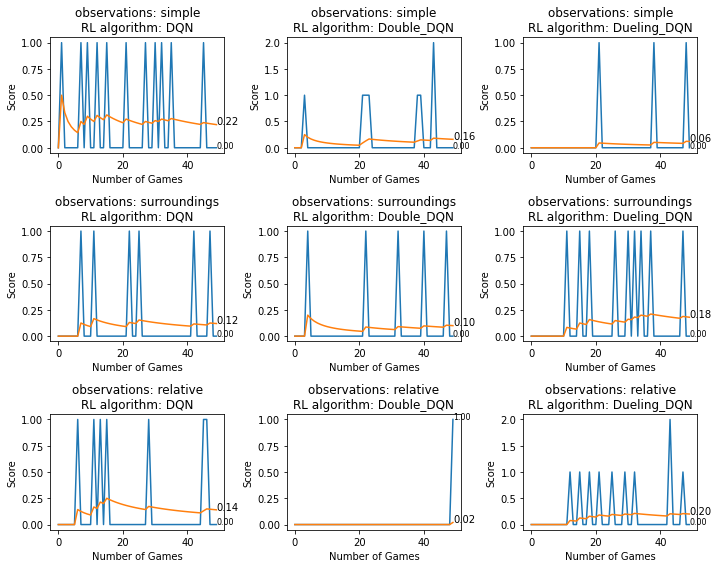

In [9]:
fig, axs = plt.subplots(3,3,figsize=(10,8))
outputs = {'simple': simple_output_dict,
          'surroundings': surroundings_output_dict,
          'relative': relative_output_dict}

output_list = []
for out_key, out_val in outputs.items():
    for key, val in out_val.items():
        output_list.append(['observations: {}\nRL algorithm: {}'.format(out_key, key),
                            val.scores, val.mean_scores, val.agent.epsilon])

for i, ax in enumerate(axs.flatten()):
    ax_plot(ax, output_list[i][1], output_list[i][2], title=output_list[i][0])
fig.tight_layout()

### Evaluation of algorithm performance

We run 20 episodes of each algorithm and observation combination, with each making the optimal policy choice (no randomness).

We se same random seed for each game so that evaluations are comparible.

### Evaluation of get_observation_simple

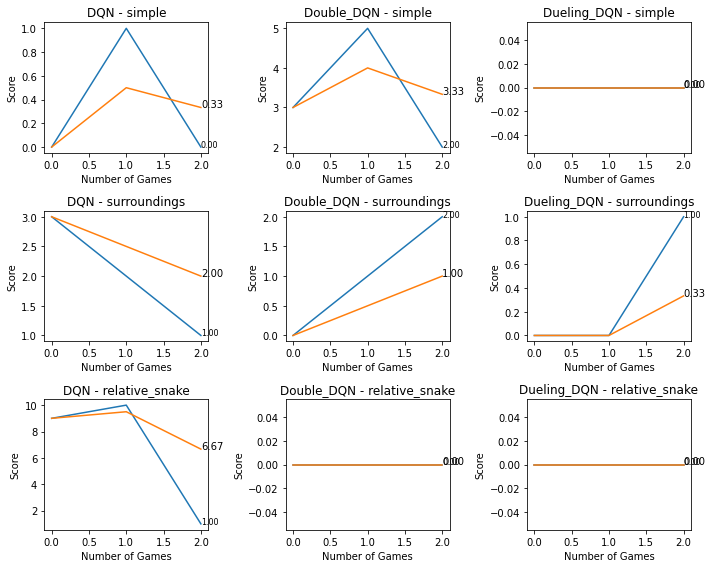

In [10]:
EVALUATION_EPISODES=3
eval_dict = {}
# for out_key, out_val in outputs.items():
for out_key in ['simple', 'surroundings', 'relative_snake']:
    for key, val in DQN_Style.items():
        game_kwargs = {'width': 640, 'height': 480, 'UI': UI,
                       'window_title': "{} - {}".format(key, out_key)
                      }
        agent, scores, mean_scores = training_loop(game_kwargs=game_kwargs,
                                                   model_name='{}_{}.pth'.format(key, out_key),
                                                   load_model=True,
                                                   get_observation=out_key,
                                                   greedy=False,
                                                   **val, # dict for kwargs
                                                   num_episodes=EVALUATION_EPISODES,
                                                   plot_update_at_end=True
                                                  )
        eval_dict["{} - {}".format(key, out_key)] = Output(agent, scores, mean_scores)
        
display.clear_output(wait=True)
        
fig, axs = plt.subplots(3,3,figsize=(10,8))

for i, ax in enumerate(axs.flatten()):
    scores = list(eval_dict.values())[i].scores
    mean_scores = list(eval_dict.values())[i].mean_scores
    title = list(eval_dict.keys())[i]
    
    ax_plot(ax, scores, mean_scores, window=None, title=title)
    
fig.tight_layout()